# Credit Card Fraud Detection using Machine Learning

# About Data:

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credit_card_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
182974,125607.0,1.977762,-1.095335,-1.409942,-0.978173,-0.529049,-0.64939,-0.366631,-0.125883,-0.647474,...,0.041682,-0.257165,0.245177,0.726821,-0.293759,-0.490609,-0.06758,-0.043119,115.5,0


In [12]:
#checking the shape
credit_card_data.shape

(284807, 31)

In [14]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [22]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [24]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [26]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [28]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [30]:
# compare the values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [34]:
# Checking the correlation
Corr = credit_card_data.corr()
Corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118655e-12,-1.733318e-13,-3.473217e-12,-1.306267e-13,-1.116392e-13,2.114528e-12,3.017911e-14,...,-3.276236e-12,2.281869e-12,-2.969729e-12,-1.029873e-12,1.144124e-12,1.835270e-12,7.624793e-12,-9.768993e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325651e-12,-2.314973e-12,-1.831958e-12,9.438428e-13,5.403434e-12,2.135019e-14,3.238522e-13,...,2.280206e-12,-2.548466e-13,-4.856124e-12,6.431365e-13,-9.423787e-13,-4.129265e-13,-9.856539e-13,2.525515e-12,-0.531409,0.091289
V3,-0.419618,-2.118655e-12,2.325651e-12,1.000000e+00,2.046203e-13,-4.032950e-12,-1.574444e-13,3.405598e-12,-1.272401e-12,-6.812407e-13,...,6.736279e-13,-8.909342e-13,4.147205e-12,3.407647e-12,5.713207e-13,-2.577282e-12,-5.041447e-12,5.189117e-12,-0.210880,-0.192961
V4,-0.105260,-1.733318e-13,-2.314973e-12,2.046203e-13,1.000000e+00,-2.552323e-13,1.084031e-12,8.135040e-13,7.334711e-13,-7.143164e-13,...,-2.696365e-12,4.347759e-13,-4.160964e-12,-2.368739e-12,1.619939e-12,-3.043206e-13,-1.456063e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473217e-12,-1.831958e-12,-4.032950e-12,-2.552323e-13,1.000000e+00,-6.934807e-14,1.573956e-11,-2.038253e-12,-1.000757e-12,...,-1.751795e-12,7.095222e-13,3.616068e-12,-2.808776e-13,1.451123e-12,-1.896131e-13,-2.124548e-12,1.010197e-11,-0.386356,-0.094974
V6,-0.063016,-1.306267e-13,9.438428e-13,-1.574444e-13,1.084031e-12,-6.934807e-14,1.000000e+00,-2.798960e-12,-5.446365e-13,2.036738e-12,...,1.476864e-12,-1.144801e-12,-1.527845e-12,1.551857e-12,-2.723721e-12,3.351237e-12,1.481313e-12,-6.069253e-13,0.215981,-0.043643
V7,0.084714,-1.116392e-13,5.403434e-12,3.405598e-12,8.135040e-13,1.573956e-11,-2.798960e-12,1.000000e+00,5.528811e-12,5.088093e-13,...,2.788238e-12,-8.133368e-13,-4.293102e-12,-2.553516e-12,-7.406763e-13,-4.476485e-12,-1.328639e-11,2.958637e-13,0.397311,-0.187257
V8,-0.036949,2.114528e-12,2.135019e-14,-1.272401e-12,7.334711e-13,-2.038253e-12,-5.446365e-13,5.528811e-12,1.000000e+00,-2.243167e-12,...,-4.022438e-12,-2.679552e-12,9.013176e-13,-1.074367e-12,-3.268984e-12,1.043840e-12,-3.499809e-12,1.866589e-12,-0.103079,0.019875
V9,-0.008660,3.017911e-14,3.238522e-13,-6.812407e-13,-7.143164e-13,-1.000757e-12,2.036738e-12,5.088093e-13,-2.243167e-12,1.000000e+00,...,3.040330e-12,-7.467437e-13,-1.011005e-12,8.579056e-13,-1.590332e-12,-7.723758e-13,2.428933e-12,-1.406862e-12,-0.044246,-0.097733


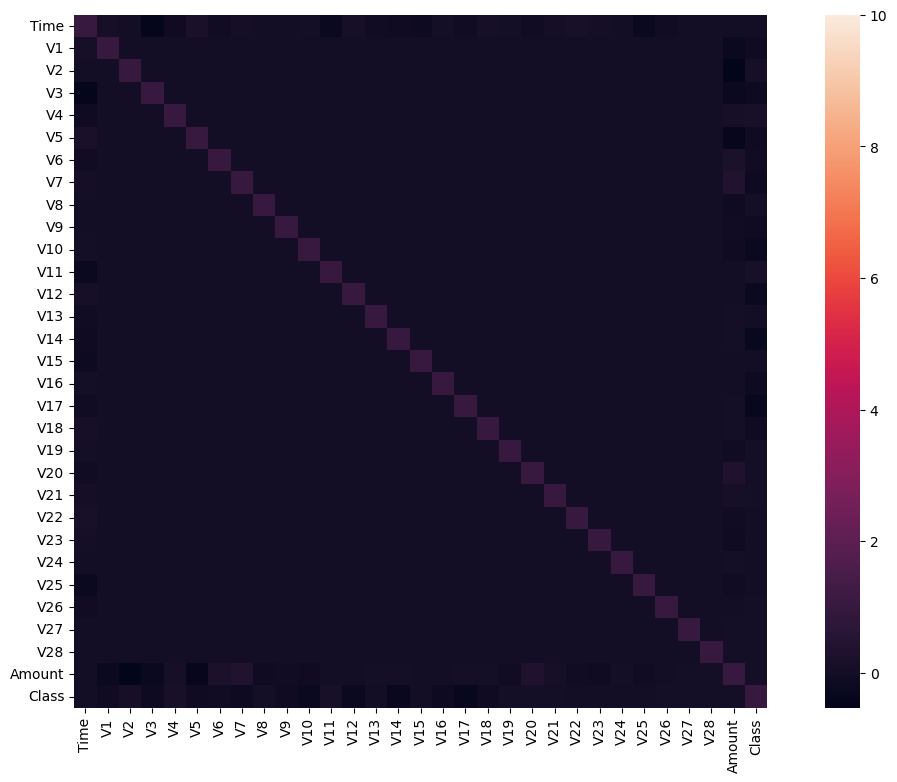

In [40]:
Correlation = credit_card_data.corr()
plotting = plt.figure(figsize = (15,9))
sns.heatmap(Correlation,vmax = 10, square = True)
plt.show()

In [42]:
legit_sample = legit.sample(n=492)

In [44]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [46]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167632,118809.0,2.109809,-0.149081,-1.377241,0.264996,0.094273,-0.844627,0.095385,-0.228157,0.755840,...,-0.347270,-0.916762,0.267863,-0.684917,-0.243537,0.242465,-0.078883,-0.069281,1.98,0
194852,130784.0,-1.807292,-0.948578,1.685221,-0.064953,-0.067360,-0.099072,-1.070759,0.884741,0.445507,...,0.525718,0.898832,-0.106274,-0.397004,-0.215960,-0.184964,0.065157,-0.121410,77.00,0
106785,70123.0,1.233767,-1.506945,0.919264,-1.035264,-1.743134,0.340422,-1.334112,0.160065,-1.415972,...,-0.146703,0.177482,-0.061724,0.268644,0.403414,-0.100308,0.071070,0.022571,80.27,0
12093,21002.0,-0.691186,0.392300,2.585249,-1.894053,-0.138236,-0.154852,0.325032,-0.092085,2.281743,...,-0.122536,0.169784,-0.422231,-0.035923,0.489148,-0.840436,-0.086574,-0.164526,11.85,0
181223,124881.0,1.979970,0.163910,-1.712428,1.205164,0.679053,-0.618231,0.592287,-0.287076,-0.121405,...,0.095642,0.463811,-0.074937,-0.373955,0.485044,-0.490046,-0.018136,-0.071692,23.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [48]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [50]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96434.077236,0.141051,-0.004367,0.015728,-0.091400,-0.042723,-0.012789,0.071684,-0.087124,0.033228,...,-0.015498,-0.029190,0.016983,-0.024196,-0.037772,0.008012,-0.007067,-0.006943,-0.004188,90.098821
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [52]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Model Training

In [59]:
model=LogisticRegression()

In [61]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437
